In [1]:
import pandas as pd 
path = ".\RawData\DataScienceDataSet1.csv"
'''
A AOV value of $3145.13 is very high when considering the price of sneakers. The metric used may be the mean  and the issue 
that has arrisen is that there are some outliers that are affecting the mean. Using Pandas, we will load in the Raw Data
in a data frame and then look at the Descriptive statistics using the describe() method.
'''
raw_df =pd.read_csv(path)
raw_df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [2]:
#Let's take a look at the Descriptive statistics  of this data set.
raw_df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [3]:
'''
The issue: When we look at orders data over a 30 day window, we naively calculate an average order value (AOV) of $3145.13. 
Reasoning: The mean is very succeptable to outliers, and with a very high Standard Deviation there is an indication that outliers are skewing the mean.

Solution: A better metric  for a quick glance could be to use the median value instead as it is less succeptible to being influenced by the outliers.
Using the median has the average AOV at $284.00 per order. This however is still not a perfect measure but it is better.
If we wish for a more accurate measure of the AOV, we should clean the data and remove any statistical outliers.
'''

'\nThe issue: When we look at orders data over a 30 day window, we naively calculate an average order value (AOV) of $3145.13. \nReasoning: The mean is very succeptable to outliers, and with a very high Standard Deviation there is an indication that outliers are skewing the mean.\n\nSolution: A better metric  for a quick glance could be to use the median value instead as it is less succeptible to being influenced by the outliers.\nUsing the median has the average AOV at $284.00 per order. This however is still not a perfect measure but it is better.\nIf we wish for a more accurate measure of the AOV, we should clean the data and remove any statistical outliers.\n'

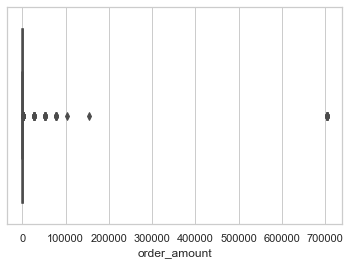

In [4]:
import seaborn as sns

sns.set_theme(style="whitegrid")



ax = sns.boxplot(x=raw_df["order_amount"])


In [5]:
'''
As you can see from the box plot, we some outliers that are causing issues with our analysis.
Following statistical convention , we will calculate the Interquartile Range (IQR) and anything outside q3 + 1.5 * IQR
or q1 - 1.5 *IQR will be discarded.
'''

'\nAs you can see from the box plot, we some outliers that are causing issues with our analysis.\nFollowing statistical convention , we will calculate the Interquartile Range (IQR) and anything outside q3 + 1.5 * IQR\nor q1 - 1.5 *IQR will be discarded.\n'

In [6]:
q1 = raw_df["order_amount"].quantile(0.25)
q3 = raw_df["order_amount"].quantile(0.75)
IQR = q3-q1
upperbound = q3 + (1.5 * IQR)
lowerbound = q1 - (1.5 * IQR)
df_no_outliers = raw_df[(raw_df["order_amount"] < upperbound) & (raw_df["order_amount"] > lowerbound)]



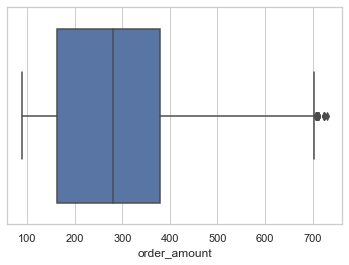

In [7]:
df_no_outliers.describe()
#the boxplot once the initial outliers are removed
bx = sns.boxplot(x=df_no_outliers["order_amount"])

In [8]:
'''
Now that the Data is cleaned from the outliers, we can use the new Mean as the metric to evaluate  the AOV.

The AOV is: $293.72 per order.
'''
print(f"\nThe metric to calculate the AOV is the mean of the data after removing outliers:${round(df_no_outliers['order_amount'].mean(),2)}")
print(f"\nAlternatively if the data is to not be modified in any manner, then we will use the median of the original data set thus the AOV would be: ${round(raw_df['order_amount'].median(),2)}")



The metric to calculate the AOV is the mean of the data after removing outliers:$293.72

Alternatively if the data is to not be modified in any manner, then we will use the median of the original data set thus the AOV would be: $284.0
